In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankie boot"]

In [5]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 64,
                             validation_data = (X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 40s 46ms/step - loss: 0.8352 - accuracy: 0.7172 - val_loss: 0.7372 - val_accuracy: 0.7286
Epoch 2/30
860/860 [==============================] - 37s 43ms/step - loss: 0.5359 - accuracy: 0.8059 - val_loss: 0.4845 - val_accuracy: 0.8228
Epoch 3/30
860/860 [==============================] - 39s 45ms/step - loss: 0.4789 - accuracy: 0.8266 - val_loss: 0.8826 - val_accuracy: 0.7038
Epoch 4/30
860/860 [==============================] - 40s 47ms/step - loss: 0.4420 - accuracy: 0.8409 - val_loss: 0.4141 - val_accuracy: 0.8588
Epoch 5/30
860/860 [==============================] - 40s 47ms/step - loss: 0.4179 - accuracy: 0.8502 - val_loss: 0.4224 - val_accuracy: 0.8508
Epoch 6/30
860/860 [==============================] - 45s 53ms/step - loss: 0.3934 - accuracy: 0.8581 - val_loss: 0.3732 - val_accuracy: 0.8714
Epoch 7/30
860/860 [==============================] - 46s 53ms/step - loss: 0.3766 - accuracy: 0.8653 - val_loss: 0.4115 - val_accuracy:

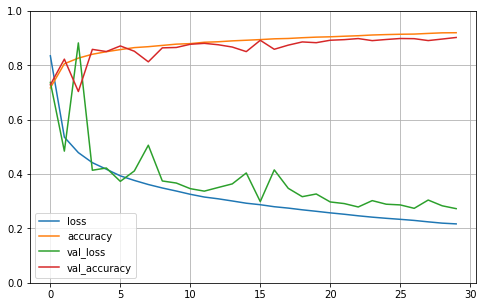

In [14]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2814 - accuracy: 0.8997


In [16]:
ev

[0.2813540995121002, 0.8996999859809875]

In [17]:
X_new = X_test[:3]

In [18]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [19]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


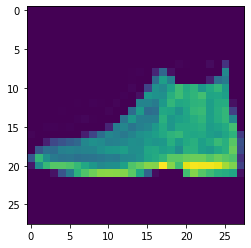

In [20]:
print(plt.imshow(X_test[0].reshape((28, 28))))

## Pooling vs non Pooling

In [21]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation = "relu"))
model_a.add(keras.layers.Dense(100, activation = "relu"))
model_a.add(keras.layers.Dense(10, activation = "softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation = "relu"))
model_b.add(keras.layers.Dense(100, activation = "relu"))
model_b.add(keras.layers.Dense(10, activation = "softmax"))

In [22]:
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [23]:
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_a.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])

model_b.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])

In [25]:
model_history_a = model_a.fit(X_train, y_train, epochs = 3, batch_size = 64,
                             validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 41s 48ms/step - loss: 0.9026 - accuracy: 0.6871 - val_loss: 0.7703 - val_accuracy: 0.7188
Epoch 2/3
860/860 [==============================] - 42s 49ms/step - loss: 0.5419 - accuracy: 0.8041 - val_loss: 0.4869 - val_accuracy: 0.8188
Epoch 3/3
860/860 [==============================] - 45s 52ms/step - loss: 0.4833 - accuracy: 0.8259 - val_loss: 1.0389 - val_accuracy: 0.6894


In [26]:
model_history_b = model_b.fit(X_train, y_train, epochs = 3, batch_size = 64,
                             validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 88s 102ms/step - loss: 0.7418 - accuracy: 0.7400 - val_loss: 0.7422 - val_accuracy: 0.7354
Epoch 2/3
860/860 [==============================] - 86s 100ms/step - loss: 0.4921 - accuracy: 0.8231 - val_loss: 0.4861 - val_accuracy: 0.8128
Epoch 3/3
860/860 [==============================] - 68s 79ms/step - loss: 0.4407 - accuracy: 0.8405 - val_loss: 0.9399 - val_accuracy: 0.7116
